<a href="https://colab.research.google.com/github/sushmita0220/Codsoft/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords# to remove stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Genre Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Genre Classification/train_data.txt
/content/drive/MyDrive/Colab Notebooks/Genre Classification/test_data.txt


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Genre Classification/train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [ ]:
v = TfidfVectorizer()
transformed_output=v.fit_transform(df_train['Description'])

In [ ]:
from sklearn.model_selection import train_test_split
y=df_train["Genre"]
X=transformed_output
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred_test = logreg.predict(X_test)
Y_pred_train = logreg.predict(X_train)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix_test = confusion_matrix(y_test, Y_pred_test)
cnf_matrix_train = confusion_matrix(y_train, Y_pred_train)
print('Confusion Matrix For Test Data = ', cnf_matrix_test)
print('Confusion Matrix For Train Data = ', cnf_matrix_train)

Confusion Matrix For Test Data =  [[  60    0    1    0    0   39    0   32   90    0    0    0    0   11
     0    0    0    0    1    0    4    4    0    0   14    0    5]
 [   0   31   10    0    0   42    0   10   25    0    0    0    0    0
     0    0    0    0    0    0    0    9    0    0    0    0    1]
 [   7    2   13    0    0   18    0   37   50    0    0    0    0    4
     0    0    0    0    0    0    4    7    0    0    0    0    0]
 [   1    0    0    1    0   25    0   16   25    0    0    0    0    5
     0    0    0    0    0    0    1   15    0    0    0    0    0]
 [   0    0    0    0    0    2    0   30   13    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   5    1    0    0    0  923    0   98  422    1    0    0    0   16
     4    0    0    0    2    2    0   34    1    1    5    0    1]
 [   4    0    0    0    0   16    0   17   53    0    0    0    0    1
     0    0    0    0    0    0    0    1    0    0   

Text(0.5, 427.9555555555555, 'Predicted label')

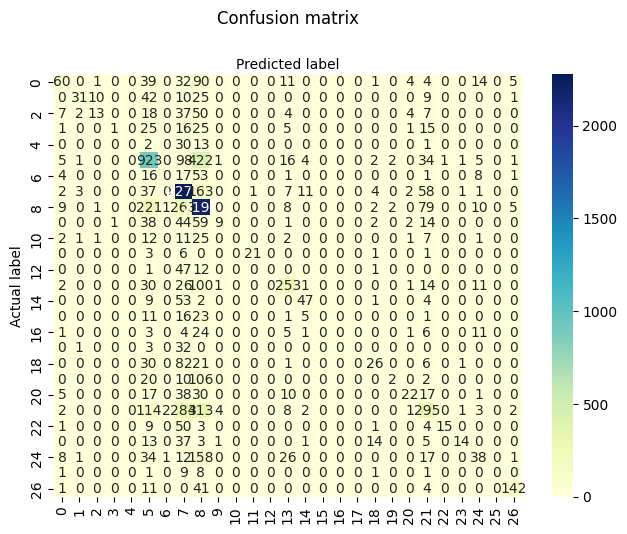

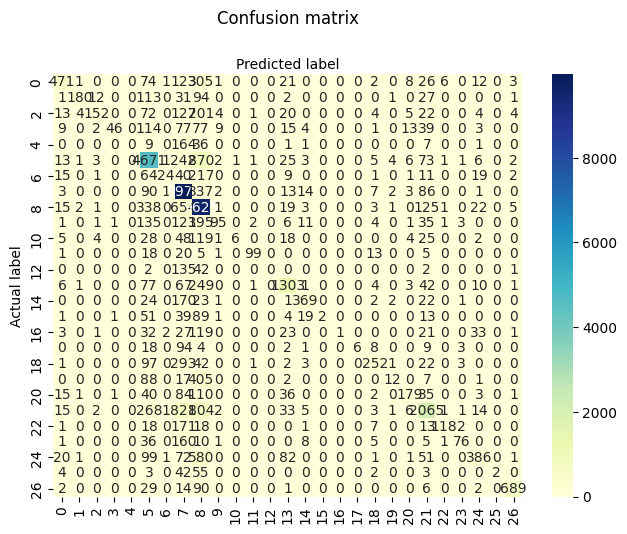

In [ ]:
#Test Data

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#Train Data

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score
print('Precision_Score_test = ', precision_score(y_test, Y_pred_test,average='micro'))
print('Recall_Score_test = ', recall_score(y_test, Y_pred_test,average='micro'))
print(classification_report(y_test, Y_pred_test))


# Train Data

print('Precision_Score_train = ', precision_score(y_train, Y_pred_train,average='micro'))
print('Recall_Score_train = ', recall_score(y_train, Y_pred_train,average='micro'))

logreg.score(X_train,y_train)


Precision_Score_test =  0.588951397214793
Recall_Score_test =  0.588951397214793


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.54      0.23      0.32       261
       adult       0.78      0.24      0.37       128
   adventure       0.50      0.09      0.15       142
   animation       0.50      0.01      0.02        89
   biography       0.00      0.00      0.00        46
      comedy       0.55      0.61      0.58      1516
       crime       0.00      0.00      0.00       101
 documentary       0.64      0.89      0.75      2567
       drama       0.55      0.79      0.65      2798
      family       0.56      0.05      0.10       170
     fantasy       0.00      0.00      0.00        63
   game-show       0.95      0.66      0.78        32
     history       0.00      0.00      0.00        61
      horror       0.70      0.58      0.63       439
       music       0.65      0.41      0.50       116
     musical       0.00      0.00      0.00        57
     mystery       0.00      0.00      0.00        56
        news       0.00    

0.7101288879666137